# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from matplotlib import pyplot as plt
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

In [2]:
pima_df = pd.read_csv("diabetes.csv")
pima_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print (pima_df.shape)


(768, 9)


In [5]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
a = pima_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].median()
a

Glucose          117.0
BloodPressure     72.0
SkinThickness     23.0
Insulin           30.5
BMI               32.0
dtype: float64

In [7]:
pima_df.replace(0, a, inplace = True)

In [8]:
pima_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
pima_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.656250   30.438286  44.000  99.75000   
BloodPressure             768.0   72.386719   12.096642  24.000  64.00000   
SkinThickness             768.0   27.334635    9.229014   7.000  23.00000   
Insulin                   768.0   94.652344  105.547598  14.000  30.50000   
BMI                       768.0   32.450911    6.875366  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    31.2500  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

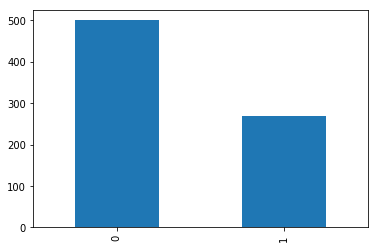

In [10]:
pima_df["Outcome"].value_counts().plot(kind='bar')
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

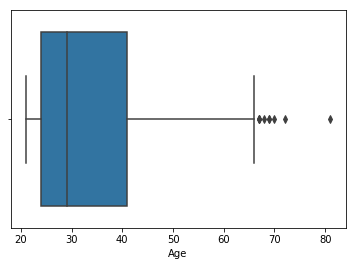

In [11]:
#age analysis
sns.boxplot(x=pima_df["Age"])

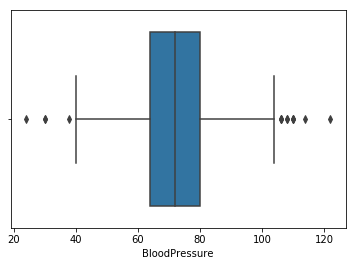

In [12]:
#bloodpressure analysis
sns.boxplot(x=pima_df["BloodPressure"])

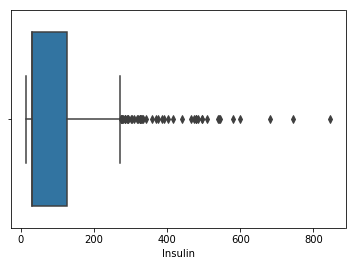

In [13]:
#insulin
sns.boxplot(x=pima_df["Insulin"])

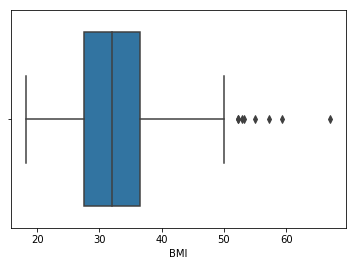

In [14]:
#BMI 
sns.boxplot(x=pima_df["BMI"])

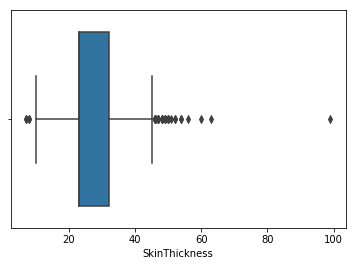

In [15]:
#skinthickness
sns.boxplot(x=pima_df["SkinThickness"])

Unvariant analysis has shows us there is a significat number of outliers, hence removing the outliers

In [16]:
c = pima_df.quantile(0.25)
d = pima_df.quantile(0.75)

IQR = d-c

df1_noout = pima_df[~((pima_df < (c - 1.5 * IQR)) |(pima_df > (d + 1.5 * IQR))).any(axis=1)]
df1_noout.shape

(636, 9)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [17]:
sns.pairplot(df1_noout, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


In [18]:
df1_noout.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.136150       0.205757       0.107373   
Glucose                      0.136150  1.000000       0.240464       0.091046   
BloodPressure                0.205757  0.240464       1.000000       0.133846   
SkinThickness                0.107373  0.091046       0.133846       1.000000   
Insulin                     -0.101168  0.237415      -0.050079       0.253677   
BMI                          0.055901  0.194072       0.266487       0.521505   
DiabetesPedigreeFunction     0.017663  0.089453       0.028007       0.125144   
Age                          0.543479  0.295758       0.352672       0.066527   
Outcome                      0.214323  0.490270       0.177565       0.153809   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.101168  0.055901                  0.017663   
Glucose                   0.237415  0.194072                  0.089453   
BloodPressure            -0.050079  0.266487                  0.028007   
SkinThickness             0.253677  0.521505                  0.125144   
Insulin                   1.000000  0.165635                  0.219786   
BMI                       0.165635  1.000000                  0.158388   
DiabetesPedigreeFunction  0.219786  0.158388                  1.000000   
Age                      -0.079830  0.076238                  0.045160   
Outcome                   0.067438  0.287197                  0.190737   

                               Age   Outcome  
Pregnancies               0.543479  0.214323  
Glucose                   0.295758  0.490270  
BloodPressure             0.352672  0.177565  
SkinThickness             0.066527  0.153809  
Insulin                  -0.079830  0.067438  
BMI                       0.076238  0.287197  
DiabetesPedigreeFunction  0.045160  0.190737  
Age                       1.000000  0.249491  
Outcome                   0.249491  1.000000

The pairplots and the correlation coefficients matrix indicate mainly the following:

    1.BMI seems to have relatively linear relationships with skin thickness & blood pressure in the decreasing order respetively. 
    
    This was the usual fact  as higher BMI values are often associated with higher fat percentages and higher blood pressure

    
Based on the above and the fact that we have a pediction problem a, 'Decision Tree'is chosen over logistic regression in this case

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [19]:
X = df1_noout.drop(["Outcome"], axis = 1)
Y = df1_noout["Outcome"]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [21]:
from sklearn.tree import DecisionTreeClassifier                                 
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_impurity_decrease=0.01)

In [22]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
Y_predict_test = dt_model.predict(X_test)
Y_predict_train = dt_model.predict(X_train)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
print(confusion_matrix(Y_test, Y_predict_test))

[[106  32]
 [ 13  40]]


In [26]:
print("Train accuracy is", accuracy_score(Y_train,Y_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y_predict_test))

Train accuracy is 0.8089887640449438
Test accuracy is 0.7643979057591623


In [27]:
dt_model.feature_importances_

array([0.04609749, 0.44720006, 0.        , 0.        , 0.03182061,
       0.18542516, 0.064093  , 0.22536369])

In [28]:
dict(zip(df1_noout.columns, dt_model.feature_importances_))

{'Pregnancies': 0.04609748774315612,
 'Glucose': 0.4472000578486633,
 'BloodPressure': 0.0,
 'SkinThickness': 0.0,
 'Insulin': 0.031820611131209944,
 'BMI': 0.18542515959461464,
 'DiabetesPedigreeFunction': 0.06409299713258773,
 'Age': 0.22536368654976824}

Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,max_depth=6,max_features = 5, random_state=1)
rfcl.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [30]:
Y2_predict_test = rfcl.predict(X_test)
Y2_predict_train = rfcl.predict(X_train)

In [31]:
print("Train accuracy is", accuracy_score(Y_train,Y2_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y2_predict_test))

Train accuracy is 0.9235955056179775
Test accuracy is 0.8167539267015707


In [32]:
Y3_pred_test = rfcl.predict_proba(X_test)[:,1]
Y3_pred_train = rfcl.predict_proba(X_train)[:,1]

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
print("train auc is",roc_auc_score(Y_train,Y3_pred_train))

train auc is 0.9830739830739831


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100, random_state=1)

In [37]:
abcl.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=1)

In [38]:
Y5_predict_test = abcl.predict(X_test)
Y5_predict_train = abcl.predict(X_train)

In [39]:
print("Train accuracy is", accuracy_score(Y_train,Y5_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y5_predict_test))

Train accuracy is 1.0
Test accuracy is 0.7643979057591623


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=500)
bgcl.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [42]:
Y4_predict_test = bgcl.predict(X_test)
Y4_predict_train = bgcl.predict(X_train)

In [43]:
print("Train accuracy is", accuracy_score(Y_train,Y4_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y4_predict_test))

Train accuracy is 0.8629213483146068
Test accuracy is 0.7958115183246073


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gbcl = GradientBoostingClassifier( n_estimators=100, random_state=1)

In [46]:
gbcl.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [47]:
Y5_predict_test = gbcl.predict(X_test)
Y5_predict_train = gbcl.predict(X_train)

In [48]:
print("Train accuracy is", accuracy_score(Y_train,Y5_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y5_predict_test))

Train accuracy is 0.946067415730337
Test accuracy is 0.806282722513089


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
vtcl1 = VotingClassifier(estimators=[ ('rf', rfcl), ('ada', abcl), ('gnb', gbcl)], voting='hard')
vtcl1.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fra...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [51]:
Y6_predict_test = vtcl1.predict(X_test)
Y6_predict_train = vtcl1.predict(X_train)

In [52]:
print("Train accuracy is", accuracy_score(Y_train,Y6_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y6_predict_test))

Train accuracy is 0.9640449438202248
Test accuracy is 0.806282722513089


In [53]:
vtcl2 = VotingClassifier(estimators=[ ('rf', rfcl), ('ada', abcl), ('gnb', gbcl)], voting='soft')
vtcl2.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fra...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [54]:
Y7_predict_test = vtcl2.predict(X_test)
Y7_predict_train = vtcl2.predict(X_train)

In [55]:
print("Train accuracy is", accuracy_score(Y_train,Y7_predict_train))
print("Test accuracy is", accuracy_score(Y_test,Y7_predict_test))

Train accuracy is 0.9955056179775281
Test accuracy is 0.8115183246073299
